In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv("creditcard.csv")

# View first few rows

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Step 2: Check Data Balance

Class
0    284315
1       492
Name: count, dtype: int64


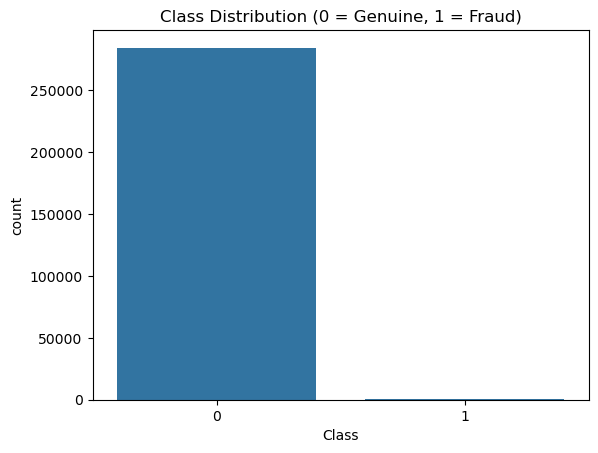

In [ ]:
# Class distribution
print(df['Class'].value_counts())

# Visualize imbalance

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Genuine, 1 = Fraud)")
plt.show()


Step 3: Handle Class Imbalance (Undersampling Method)

In [5]:
# Separate fraud and genuine transactions
fraud = df[df['Class'] == 1]
genuine = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)

# Combine them into a new balanced dataset
balanced_df = pd.concat([fraud, genuine])

# Shuffle the data
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
balanced_df['Class'].value_counts()


Class
0    492
1    492
Name: count, dtype: int64

 Step 3.2: Visualize Balanced Dataset

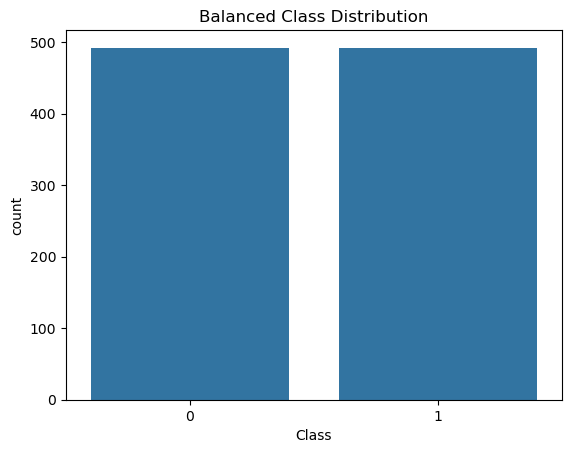

In [6]:
sns.countplot(x='Class', data=balanced_df)
plt.title("Balanced Class Distribution")
plt.show()


Step 4: Train and Evaluate the Fraud Detection Model

In [7]:
# Separate features and target
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']


In [8]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


c:\Users\Manickaraj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [10]:
y_pred = model.predict(X_test)


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 82   5]
 [  9 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        87
           1       0.95      0.92      0.94       110

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



Visualization 

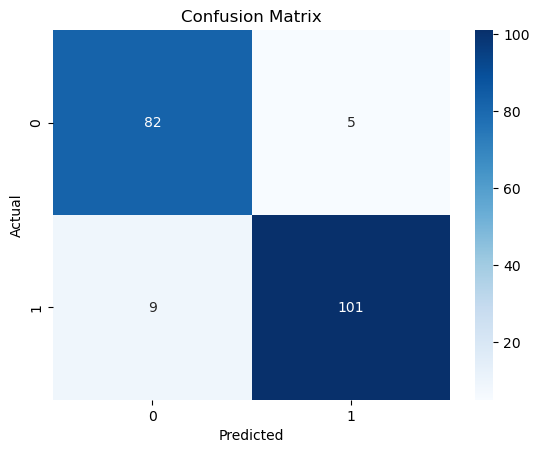

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
